# ДЗ №2 - обучение многослойной нелинейной искусственной нейронной сети методом градиентного спуска

Реализовать обучение ИНС методом градиентного спуска.

В этом задании предлагается реализовать нейросеть по аналогии с ДЗ №1. На этот раз нейросеть должна быть многослойной; функции активации должны отличаться от идентичных. Можете использовать ReLU, сигмоид, гиперболический тангенс или вашу любимую. Материал для вдохновения в этом отношении можно искать [на Википедии](https://en.wikipedia.org/wiki/Activation_function)

В решении ожидается наличие следующих ключевых составляющих:<br />

#### Текстовое описание в решении:
- формулировка задачи, формулировка признакового описания объектов, формулировка функции ошибки;
- исследование исходных данных на предмет скоррелированности признаков; фильтрация признаков; порождение признаков (при необходимости; отсутствие этого шага не является недочетом, но вам же будет без него неудобно);
- оценка параметров модели ИНС (обучение модели) методом градиентного спуска;

#### Код решения:
(используйте предлагаемые шаблоны)
- формулировка всех составляющих модели "нейросети";
- формулировка модели "нейросети" - `NN` (многослойного перцептрона);
- формулировка функции ошибки вместе с ее составляющими (например, класс отклонения `Residual`);
- формулировка цикла оптимизации параметров.


#### Визуализация в решении:
- распределения признаков;
- распределение целевой переменной;
- эволюция функции ошибки и выбранных метрик качества по ходу обучения.
- диаграмма соответствия измеренной целевой переменной и значений целевой переменной, оцененной с использованием обученной "нейросети" (т.н. диаграмма рассеяния)

Примечания:

В этом ДЗ экспертное порождение новых признаков НЕ ДОПУСКАЕТСЯ. Все признаки должны быть выучены вашей нейросетью в процессе обучения.

Реализация нейросети может быть написана только с использованием библиотеки Numpy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

Данные находятся в следующих файлах:

Признаковое описание объектов обучающей выборки - в файле X_train.npy

Значения целевой переменной на обучающей выборке - в файле y_train.npy

Способ чтения данных из файлов *.npy :

```
import numpy as np
data = np.load('/path/to/filename.npy')
```

### Примечание на предмет реализации градиента функции потерь

В качестве шпаргалки можно подсмотреть правила матричного дифференцирования <a href="https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf">здесь</a>

В этом ДЗ следует очень аккуратно реализовать градиент каждой отдельной операции по аргументу этой операции:
- градиент квадрата отклонения $d^2$ - по отклонению $d$
- градиент отклонения $\left(\hat{y}-y\right)$ - по аргументу $\hat{y}$
- градиент функции активации $\hat{y}=A\left(z\right)$ - по ее агрументу $z$
- градиент оценки $z=\theta^T\cdot h$ - по аргументу $\theta$

**ВНИМАНИЕ**
В этом задании также следует учесть, что подразумевается, что метод `backward` каждого класса выдает градиент **функции ошибки** по аргументу операции. Для учета градиентов всех предыдущих операций в этот метод передается т.н. **upstream gradient** - переменная `usg`. Не забывайте ее передавать при "сборке" полного градиента. Эта "сборка" у вас будет в двух классах - классе функции потерь `MSE` (нужно собрать градиент операции `MSE` с учетом того, что она, в свою очередь, сложная функция, использующая `Residual`) и классе нейросети `NN`.

Как можно видеть, все операции, из которых составляется "нейросеть" в этом задании, могут быть представлены однотипно: для всех из них можно задать метод вычисления `forward` на "прямом проходе" и метод вычисления градиента `backward` на этапе вычисления градиентов, "обратном проходе".

**ВНИМАНИЕ**
Не следует забывать, что для вычисления градиентов обычно используются результаты операции, вычисленные на этапе "прямого прохода". Для хранения этих результатов используйте атрибуты класса `cache`. Напомним, ссылка на сам экземпляр класса в теле метода класса обычно упоминается как `self`. То есть, атрибут `cache` этого экземпляра класса будет в этом методе упоминаться как `self.cache`. Вы можете назвать его как угодно (не обязательно именно `cache`), но реализация хранения промежуточных результатов вычисления нейросети - **обязательно** в этом ДЗ.

In [27]:
import numpy as np
from tqdm import tqdm

In [28]:
%matplotlib inline

In [29]:
import matplotlib.pyplot as plt

In [30]:
Xtr = np.load('./X_train.npy')
ytr = np.load('./y_train.npy')

In [31]:
ytr.shape

(10000, 1)

In [32]:
Xtr.shape

(10000, 4)

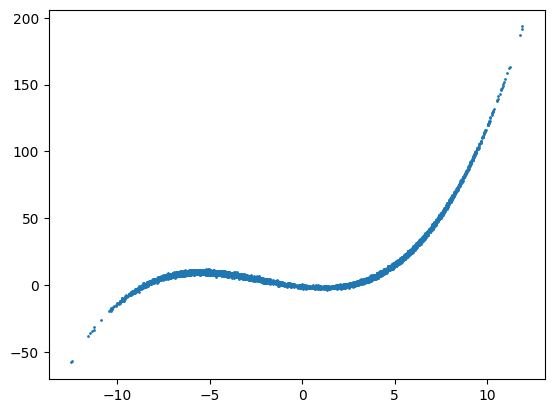

In [33]:
plt.scatter(Xtr[:,0], ytr, s=1)

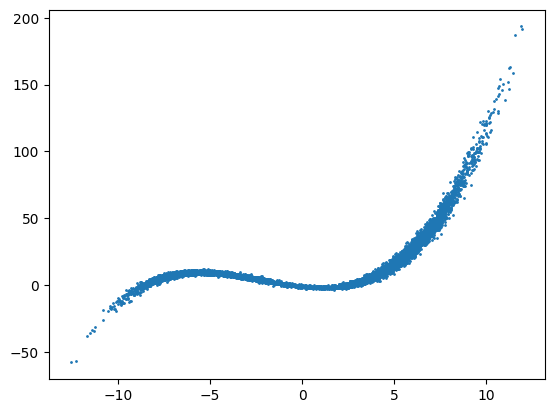

In [34]:
plt.scatter(Xtr[:,1], ytr, s=1)

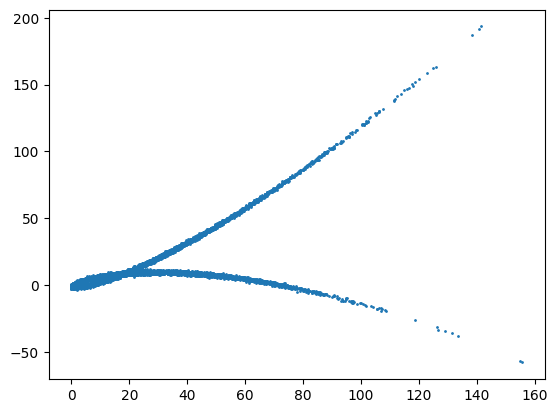

In [35]:
plt.scatter(Xtr[:,2], ytr, s=1)

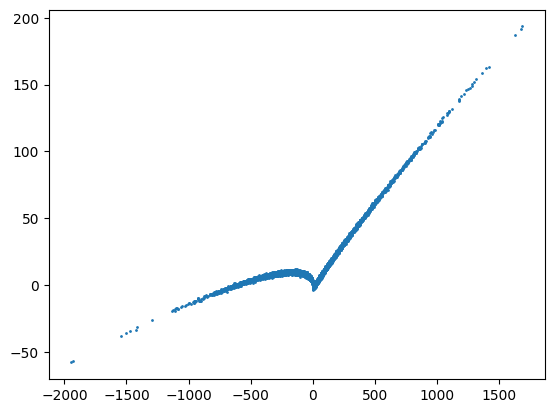

In [36]:
plt.scatter(Xtr[:,3], ytr, s=1)

In [37]:
np.corrcoef(Xtr, rowvar=False)

array([[1.        , 0.99930832, 0.00924955, 0.88100664],
       [0.99930832, 1.        , 0.0096915 , 0.88030952],
       [0.00924955, 0.0096915 , 1.        , 0.01899396],
       [0.88100664, 0.88030952, 0.01899396, 1.        ]])

In [38]:
# Примите решение о фильтрации признаков или порождении новых признаков
# Xtr = ...

In [52]:
class Differentiable:
    def __init__(self):
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    def backward(self, **kwargs):
        raise NotImplementedError()

In [53]:
class Residual(Differentiable):
    def __init__(self):
        super(Residual, self).__init__()
    
    def __call__(self, mu, y):
        return self.forward(mu, y)
    
    def forward(self, mu, y):
        # Этот метод реализует вычисление отклонения mu-y
        d = np.subtract(mu, np.transpose(y))
        self.cache = d
        
        return d
    
    def backward(self, usg):
        # Этот метод реализует вычисление градиента отклонения D по аргументу mu
        
        partial_grad = -usg
        return partial_grad

In [54]:
class MSE(Differentiable):
    def __init__(self):
        super(MSE, self).__init__()
        self.diff = Residual()
    
    def __call__(self, mu, y):
        # d = ...
        return self.forward(d)
    
    def forward(self, d):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        self.cache = d
        mse_value = np.divide(np.sum(np.square(d)), len(d))
        
        return mse_value
    
    
    def backward(self):
        # Этот метод реализует вычисление градиента функции потерь по аргументу d
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента d
        
        n = 2 / (self.cache.shape[1])
        partial_grad = n * self.cache
        # self.cache = None
        # print('5', partial_grad.shape)

        # 1*N
        return partial_grad

In [55]:
class linear(Differentiable):
    def __init__(self):
        super(linear, self).__init__()
        self.theta = None
        self.cache = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        # ВНИМАНИЕ! Матрица объекты-признаки X не включает смещение
        #           Вектор единиц для применения смещения нужно присоединить самостоятельно!
        
        ### YOUR CODE HERE
        # X_ = ...
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            # Fx1.T dot NxF.T = 1xN
            # Если X - матрица объекты-признаки, то это матрица из вектор-строк!
            self.theta = np.matrix(np.random.uniform(-1, 1, Xtr.shape[1] + 1))
        
        
        # Здесь следует собственно применить модель к входным данным
        
        mu = np.dot(self.theta[:,:-1], np.transpose(X)) + self.theta[:,-1]
        self.cache = X
        
        return mu
    
    def backward(self, usg):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        assert self.cache is not None, "please perform forward pass first"
        
        partial_grad = np.column_stack((self.cache, np.array([1] * self.cache.shape[0])))
        partial_grad = np.matmul(usg, partial_grad)
        
        # Не забудьте очистить кэш!
        self.cache = None
        
        return partial_grad

In [56]:
class Identity(Differentiable):
    def __init__(self):
        super(Identity, self).__init__()
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения функции активации
        return self.forward(X)


    def forward(self, X):
        # этот метод предназначен для вычисления функции активации
        X[X < 3] = 0
        self.cache = X
        
        return X
    
    def backward(self, usg):
        # Этот метод реализует вычисление компоненты градиента функции потерь

        partial_grad = self.cache
        partial_grad[partial_grad > 0] = 1
        usg = np.matmul(usg, partial_grad)
        self.cache = None
        
        return usg

In [57]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения функции активации
        return self.forward(X)
    
    def backward(self, usg):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        return None
    
    def forward(self, X):
        # этот метод предназначен для вычисления функции активации
        return None

In [58]:
class NN(Differentiable):
    def __init__(self):
        super(NN, self).__init__()
        self.l1 = linear()
        self.act = Activation()
    
    def __call__(self, X):
        return self.forward(X)
    
    def forward(self, X):
        # Этот метод будет вычислять нейросеть на данных X
        ### YOUR CODE HERE
        x = self.l1(X)
        # print('1', x)
        x = self.act(x)
        # print('2', x)
        
        return x
    
    def backward(self, usg):
        grad = None
        ### YOUR CODE HERE
        grad = self.act.backward(usg)
        # print('3', grad.shape)
        grad = self.l1.backward(grad)
        # print('4', grad.shape)
        return grad

In [59]:
class Loss(Differentiable):
    def __init__(self):
        super(Loss, self).__init__()
        self.dev = Residual()
        self.mse = MSE()
    
    def __call__(self, mu, y):
        return self.forward(mu, y)
    
    def forward(self, mu, y):
        # Этот метод будет вычислять нейросеть на данных X
        ### YOUR CODE HERE
        d = self.dev(mu, y)
        l = self.mse(d)
        return l
    
    # def backward(self, usg):
    def backward(self):
        grad = None
        ### YOUR CODE HERE
        grad = self.mse.backward()
        # print('1', grad.shape)
        grad = self.dev.backward(grad)
        # print('2', grad.shape)
        
        return grad

In [60]:
def clip_by_norm(grad, max_norm = 1.0):
    grad_norm = np.linalg.norm(grad)
    if grad_norm > max_norm:
        grad = max_norm * grad / grad_norm
    return grad

In [61]:
network = NN()

In [62]:
mu = network(Xtr)

In [63]:
loss_fn = Loss()

In [64]:
loss = loss_fn(mu, ytr)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [65]:
loss_fn.backward()

AttributeError: 'MSE' object has no attribute 'cache'

In [ ]:
network.backward(loss_fn.backward())

In [ ]:
learning_rate = 1e-4
epochs = 10000

### Далее идет процедура обучения созданной нейросети

In [ ]:
loss_history = []
pbar = tqdm(total=epochs)
for epoch in range(epochs):
    mu = None
    loss_value = None
    grad = None
    grad = clip_by_norm(grad, 1.0)
    
    ### YOUR CODE HERE
    # mu = ...
    # loss_value = ...
    # grad = ...
    # grad = clip_by_norm(grad, 10)
    
    # update network parameters
    # network.l1.theta = ... + ...
    loss_history.append(loss_value)
    pbar.update(1)
    pbar.set_postfix({'loss': loss_value})
pbar.close()

In [ ]:
# отобразите эволюцию функции потерь по мере обучения сети
plt.plot(loss_history)
plt.yscale('log')

In [ ]:
# примените нейросеть к данным Xtr
mu = network(Xtr)

In [ ]:
# отобразите диаграмму y(y_true) для оценки соответствия полученного решения известному
plt.scatter(ytr, mu, s=1)